<a href="https://colab.research.google.com/github/jpmartins03/Codigos-Cpp/blob/main/C%C3%B3pia_de_TrabalhoIA_LucasLiz_JoaoMontera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ETAPA 1


In [ ]:
# --- ETAPA DE LIMPEZA ---

# 1. Corrigir a coluna 'TotalCharges'
# Primeiro, forçamos a conversão para número. Onde houver erro (espaços em branco), será criado um valor nulo (NaN).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Agora, preenchemos os valores nulos com a mediana da coluna (estratégia segura para não afetar a distribuição)
mediana = df['TotalCharges'].median()
df['TotalCharges'].fillna(mediana, inplace=True)

# 2. Remover a coluna 'customerID'
df.drop('customerID', axis=1, inplace=True)


# --- VERIFICAÇÃO ---
print("--- DADOS APÓS A LIMPEZA ---")
print("Valores nulos restantes na coluna 'TotalCharges':", df['TotalCharges'].isnull().sum())
print("\nDataFrame sem a coluna 'customerID':")
display(df.head())

--- DADOS APÓS A LIMPEZA ---
Valores nulos restantes na coluna 'TotalCharges': 0

DataFrame sem a coluna 'customerID':


/tmp/ipython-input-2-1325523461.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mediana, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Importar as bibliotecas que vamos usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# O nome do arquivo que você acabou de enviar
nome_do_arquivo = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# 1. Carregar os dados usando Pandas
df = pd.read_csv(nome_do_arquivo)

# 2. Mostrar as 5 primeiras linhas para conferir
print("--- Amostra dos Dados ---")
display(df.head())

# 3. Verificar as informações gerais (colunas, tipos, valores nulos)
print("\n--- Informações do DataFrame ---")
df.info()

--- Amostra dos Dados ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

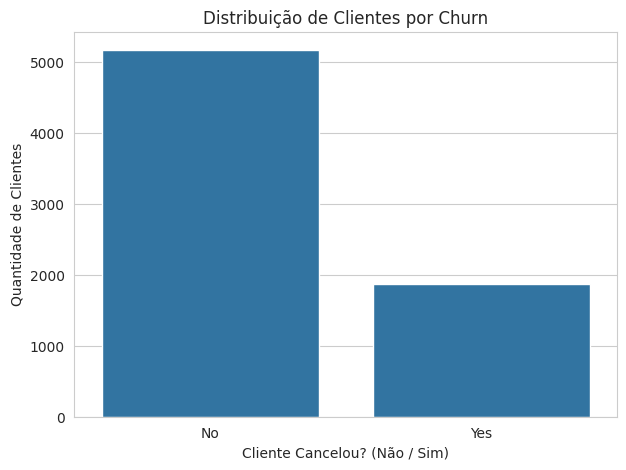

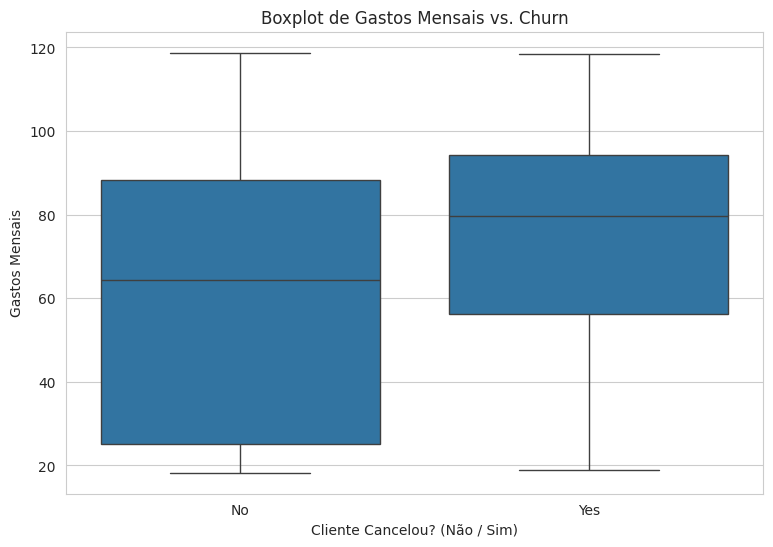

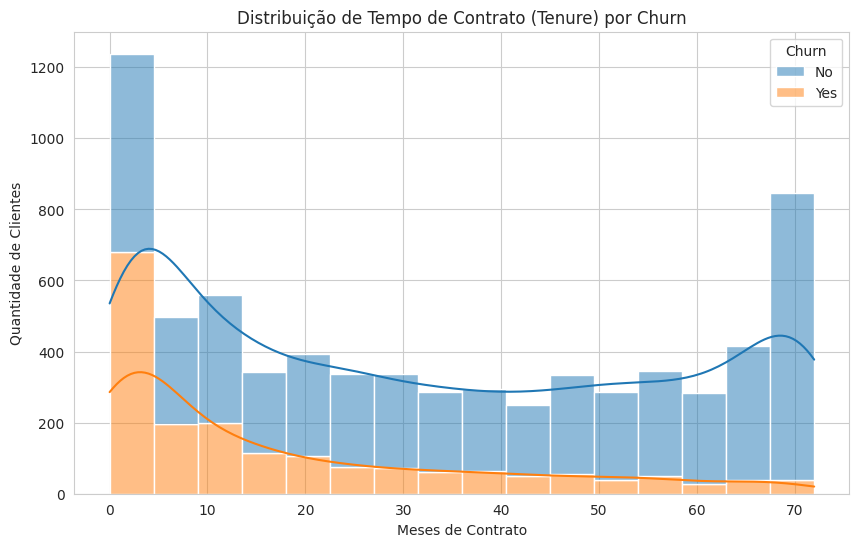

In [ ]:
# --- ETAPA DE ANÁLISE GRÁFICA (EDA) ---

# Define o estilo dos gráficos para ficarem mais bonitos
sns.set_style('whitegrid')

# Gráfico 1: Ver a proporção de clientes que cancelaram (Churn)
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Cliente Cancelou? (Não / Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Gráfico 2: Ver como os gastos mensais se comparam entre quem cancela e quem fica
plt.figure(figsize=(9, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot de Gastos Mensais vs. Churn')
plt.xlabel('Cliente Cancelou? (Não / Sim)')
plt.ylabel('Gastos Mensais')
plt.show()

# Gráfico 3: Ver a distribuição do tempo de contrato dos clientes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição de Tempo de Contrato (Tenure) por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.show()

In [ ]:
# --- ETAPA DE PRÉ-PROCESSAMENTO FINAL ---
from sklearn.preprocessing import StandardScaler

# Fazemos uma cópia do dataframe para não alterar o original
df_processed = df.copy()

# 1. Converter a coluna alvo 'Churn' para 0 (Não) e 1 (Sim)
df_processed['Churn'] = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Separar as colunas categóricas das numéricas
# (excluindo a coluna 'Churn' que já é o nosso alvo)
categorical_cols = df_processed.select_dtypes(include='object').columns
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).drop('Churn', axis=1).columns

# 3. Aplicar One-Hot Encoding nas colunas categóricas
# Isso transforma cada categoria de texto em uma nova coluna com 0s e 1s
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# 4. Escalonar as variáveis numéricas originais
scaler = StandardScaler()
# Usamos .fit_transform() para aprender a escala e aplicá-la
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])


# --- VERIFICAÇÃO ---
print("--- DADOS FINAIS PRONTOS PARA OS MODELOS ---")
print("Dimensões do DataFrame processado:", df_processed.shape)
print("\nAmostra dos dados processados:")
display(df_processed.head())

--- DADOS FINAIS PRONTOS PARA OS MODELOS ---
Dimensões do DataFrame processado: (7043, 31)

Amostra dos dados processados:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


ETAPA 2

In [ ]:
# --- ETAPA 2: SELEÇÃO DE ATRIBUTOS E PCA ---
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# 1. Separar os dados em atributos (X) e o alvo (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# 2. Selecionar os 20 melhores atributos para o modelo
# O f_classif é um teste estatístico que mede a relação entre cada atributo e o Churn
k_best = SelectKBest(score_func=f_classif, k=20)
X_selected = k_best.fit_transform(X, y)

# Guardar os nomes das colunas selecionadas para vermos depois
selected_features = X.columns[k_best.get_support()]
print("--- Melhores 20 Atributos Selecionados ---")
print(list(selected_features))

# Criar um novo DataFrame apenas com os melhores atributos
# É este 'X_selected_df' que usaremos para treinar os modelos na Etapa 3
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)


# 3. Aplicar PCA para visualização futura
# Reduzimos os dados para 2 dimensões para poder plotar em um gráfico
pca = PCA(n_components=2)
# Usamos o X original (com todos os atributos) para o PCA, para capturar toda a informação
X_pca = pca.fit_transform(X)

print("\n--- Processamento da Etapa 2 Concluído ---")
print("Formato dos dados com atributos selecionados (para modelos):", X_selected_df.shape)
print("Formato dos dados com PCA (para visualização):", X_pca.shape)

--- Melhores 20 Atributos Selecionados ---
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']

--- Processamento da Etapa 2 Concluído ---
Formato dos dados com atributos selecionados (para modelos): (7043, 20)
Formato dos dados com PCA (para visualização): (7043, 2)


ETAPA 3


--- Treinando Decision Tree ---
Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 5}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8269



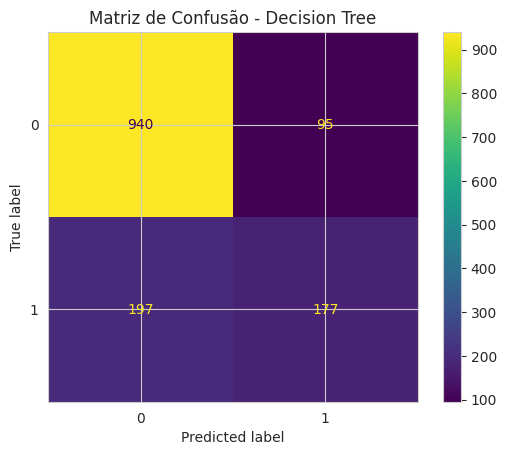

--- Treinando SVM ---
Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8231



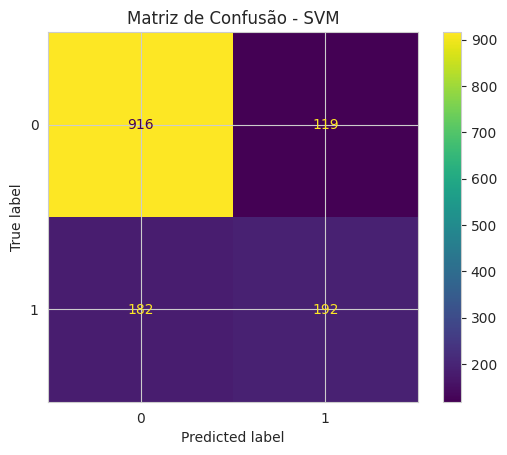

--- Treinando MLP ---
Melhores Parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

ROC AUC Score: 0.8419



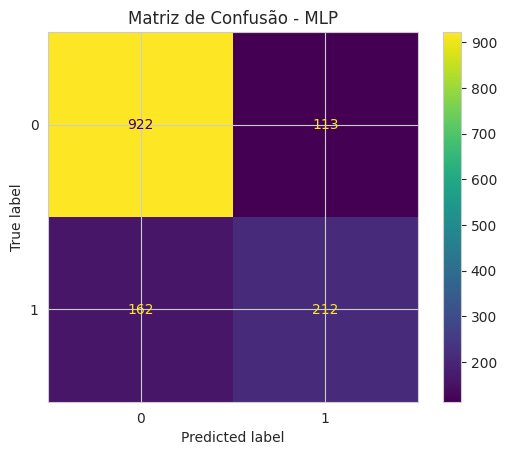


--- Comparação Final dos Modelos ---


,ROC AUC
MLP,0.841866
Decision Tree,0.826874
SVM,0.823095


In [ ]:
# --- ETAPA 3: MODELOS DE CLASSIFICAÇÃO ---
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# 1. Dividir os dados em treino e teste (80% para treino, 20% para teste)
# Usaremos o X_selected_df que criamos na etapa anterior
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_df, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Definir os modelos e os hiperparâmetros para testar com GridSearchCV
# Para ser rápido, vamos testar poucas opções
models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1],
            'kernel': ['linear', 'rbf']
        }
    },
    'MLP': {
        'model': MLPClassifier(max_iter=500, random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh']
        }
    }
}

# Dicionário para guardar os resultados
results = {}

# 3. Treinar e avaliar cada modelo
for model_name, config in models.items():
    print(f"--- Treinando {model_name} ---")
    # Usamos cv=3 (3-fold cross-validation) para ser mais rápido
    grid_search = GridSearchCV(config['model'], config['params'], cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Guardar os resultados
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    results[model_name] = {
        'best_params': grid_search.best_params_,
        'report': classification_report(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    # Imprimir os resultados
    print(f"Melhores Parâmetros: {results[model_name]['best_params']}")
    print(f"Relatório de Classificação:\n{results[model_name]['report']}")
    print(f"ROC AUC Score: {results[model_name]['roc_auc']:.4f}\n")

    # Plotar a Matriz de Confusão
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 4. Criar um DataFrame para comparar os modelos
results_df = pd.DataFrame(
    {'ROC AUC': [res['roc_auc'] for res in results.values()]},
    index=results.keys()
).sort_values(by='ROC AUC', ascending=False)

print("\n--- Comparação Final dos Modelos ---")
display(results_df)

ETAPA 4


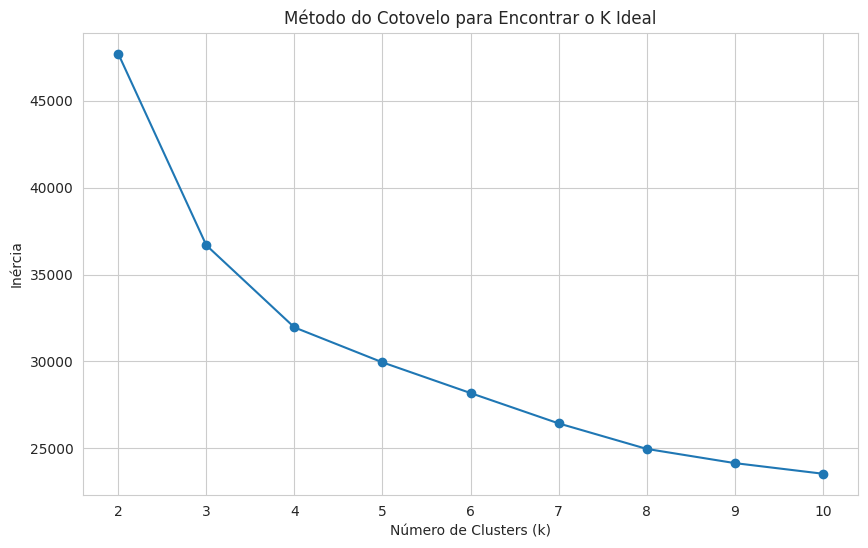


--- Análise dos Clusters ---


,tenure,MonthlyCharges,Churn
Cluster,,,
2,29.371227,80.454930,0.465795
3,15.905011,66.651851,0.396036
1,59.302326,89.643321,0.126555
0,30.547182,21.079194,0.074050


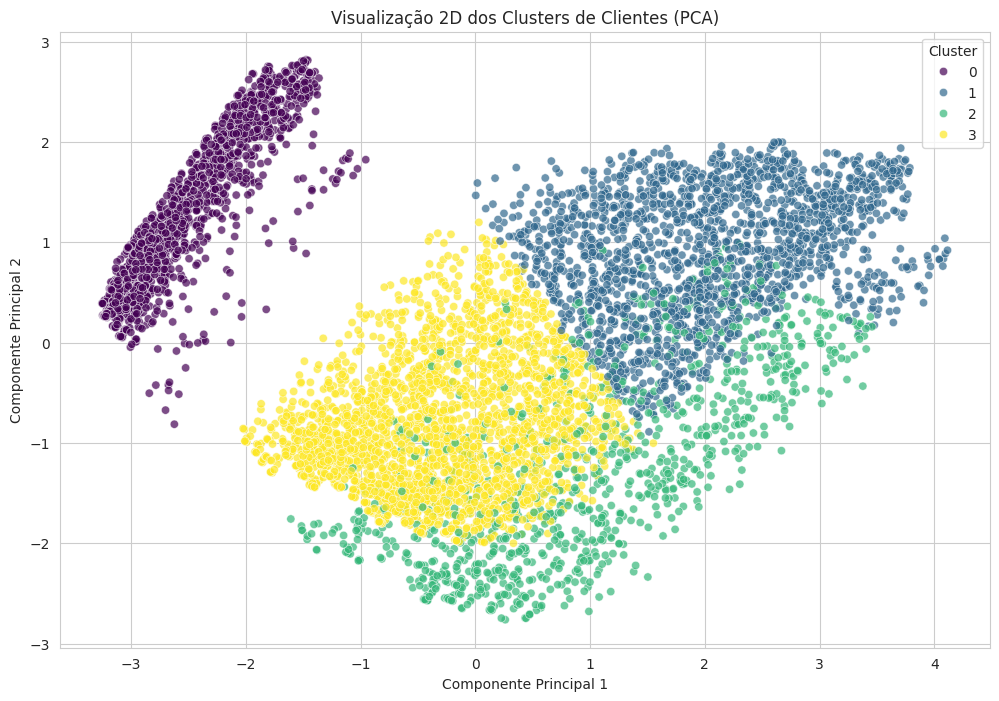

In [ ]:
# --- ETAPA 4: CLUSTERING E SEGMENTAÇÃO (CÓDIGO CORRIGIDO) ---
from sklearn.cluster import KMeans

# Para o clustering, usamos o DataFrame original processado (X),
# pois queremos segmentar os clientes com base em todas as informações.
X_for_clustering = df_processed.drop('Churn', axis=1)

# 1. Encontrar o número ideal de clusters (k) com o "Método do Cotovelo"
inertia = []
k_range = range(2, 11) # Vamos testar de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo para Encontrar o K Ideal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- ANÁLISE DO GRÁFICO ---
# Olhando o gráfico, um bom "cotovelo" parece estar em k=3 ou k=4.
# Vamos escolher k=4 para ter uma segmentação um pouco mais detalhada.

# 2. Aplicar o K-Means com o k escolhido
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_for_clustering)

# 3. Analisar os clusters
# Adicionamos os labels dos clusters ao DataFrame original para facilitar a interpretação
df_analysis = df.copy()
df_analysis['Cluster'] = cluster_labels

# ***** AQUI ESTÁ A CORREÇÃO *****
# Convertemos a coluna 'Churn' para numérico (0/1) ANTES de calcular a média
df_analysis['Churn'] = df_analysis['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Agora o groupby vai funcionar
cluster_analysis = df_analysis.groupby('Cluster')[['tenure', 'MonthlyCharges', 'Churn']].mean().sort_values(by='Churn', ascending=False)

print("\n--- Análise dos Clusters ---")
display(cluster_analysis)


# 4. Visualizar os clusters em 2D usando PCA
# Usamos o X_pca que guardamos na Etapa 2
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', alpha=0.7)
plt.title('Visualização 2D dos Clusters de Clientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

Interpretando os Segmentos de Clientes
Sua análise dividiu os clientes em 4 grupos distintos. Olhando a tabela, podemos dar um "apelido" para cada um, com base no comportamento deles:

Cluster 2: Clientes de Risco (Churn Alto)

Taxa de Churn: 46.6% (a mais alta de todas!)

Características: Têm um tempo de contrato médio (29 meses) e pagam caro (R$ 80,45 por mês).

Insight: Este é o seu grupo mais problemático. São clientes que já estão há algum tempo na base, pagam um valor considerável, mas estão cancelando em massa. A empresa precisa focar em ações de retenção urgentes para este grupo (oferecer descontos, melhores planos, etc.).

Cluster 3: Clientes Novos e Insatisfeitos

Taxa de Churn: 39.6% (a segunda mais alta)

Características: São clientes muito recentes (só 16 meses em média) e pagam um valor moderado (R$ 66,65).

Insight: Este grupo representa falhas no processo inicial. São pessoas que contratam o serviço e, por algum motivo, se decepcionam rápido. A empresa deveria investigar o que acontece nos primeiros meses: o serviço não atende às expectativas? O suporte é ruim? Melhorar a experiência inicial (onboarding) é a chave aqui.

Cluster 1: Clientes Leais e de Alto Valor

Taxa de Churn: 12.7% (baixa)

Características: São os clientes mais antigos (59 meses, quase 5 anos!) e que mais gastam (R$ 89,64).

Insight: Este é o seu melhor grupo de clientes. São leais e lucrativos. A empresa deve focar em mantê-los satisfeitos com programas de fidelidade, benefícios exclusivos e garantir que o serviço continue excelente para eles.

Cluster 0: Clientes Econômicos e Estáveis

Taxa de Churn: 7.4% (a mais baixa de todas)

Características: Têm um tempo de contrato médio (30 meses), mas pagam muito pouco (R$ 21,07).

Insight: Este grupo provavelmente tem apenas os serviços mais básicos e não causa problemas. São clientes estáveis e de baixo custo. A empresa pode tentar, com cuidado, oferecer upgrades de serviço (upsell) para aumentar a receita vinda deles.

E o gráfico?

O gráfico de visualização 2D que apareceu logo depois da tabela mostra esses 4 grupos como nuvens de pontos coloridas. Ele serve para provar visualmente que o algoritmo K-Means conseguiu separar os clientes em grupos distintos com base nos seus dados.

Próximos Passos (Fora do Código):

Organizar o Notebook: Coloque títulos e comentários em português nas células para explicar o que cada parte do código faz.

Montar a Apresentação: Use esses resultados! Crie slides para:

Mostrar o desempenho dos modelos de classificação (a tabela com MLP sendo o melhor).

Apresentar cada um dos 4 clusters de clientes com os insights que descrevemos acima.

Dar recomendações de negócio para a empresa com base nessa análise.

Gravar a Demo: Grave um vídeo curto (máximo 10 min) mostrando seu notebook funcionando e explicando os resultados.

Você tem todo o material necessário. Bom trabalho na finalização!